# Startup Profit Prediction

## Exploratory Data Analysis

The Background Introduction  
Analyze the flight booking dataset obtained from the “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it.'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

The Approach  
1. Perform some quick EDA(Exploratory Data Analysis)
2. Feature Engineering
3. Data Cleaning
4. Encoding, Scaling and Preprocessing
5. Traning Machine Learning Models
5. Cross Validation and Ensembling Predictions

Prediction Used Model:
  *   1. Multivariate Linear Regression

Target Cluster Datasets is about a set of data regarding about profit based on  following fields.  

Analyze information  
4 non-binary categorical features: Airline, Source, Destination, Total_Stops  
4 continuous features: Date_of_Journey, Dep_Time, Arrivial_Time, Duration  
2 possible drop feature: Route, Additional_Info  
1 target variable: Price  

In [594]:
# import from google colab
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground
!pip install -r requirements.txt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground


In [595]:
#Code to verify the package installation
try:
  import tqdm
  print('package is installed.')
except:
  print('Package not found')

package is installed.


In [596]:
# Configuration Setting
# from google.colab import data_table
# data_table.enable_dataframe_formatter()

In [597]:
# Import necessary packages
import warnings
warnings.filterwarnings('ignore')
import execdata as exe
from tabulate import tabulate
import pickle
import time
from rich.progress import track

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # for showing percentage in it
import seaborn as sns
import itertools
%matplotlib inline
sns.set(style='darkgrid', font_scale=1.4)

#Imbalanced Dataset Learning
from imblearn.combine import SMOTEENN

#Scikit-Learn Fundamental Packages
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
# from sklearn.metrics import roc_auc_score,roc_curve, plot_roc_curve
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [598]:
# for i in track(range(15), description="[green]Loading..."):
#   time.sleep(1)

In [599]:
root_dir = '/content/drive/MyDrive'
work_dir = '/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6P03-Flight Fare Prediction'
data_path =f'{work_dir}/data'
result_dir = f'{work_dir}/result'

In [600]:
import os
if not os.path.exists(data_path):
  os.mkdir(data_path)

In [601]:
import os
if not os.path.exists(result_dir):
  os.mkdir(result_dir)

In [602]:
%cd '{work_dir}'
!pwd

/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6P03-Flight Fare Prediction
/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6P03-Flight Fare Prediction


## Importing dataset

1. Since data is in form of excel file we have to use pandas read_excel to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3. Check whether any null values are there or not. if it is present then following can be done,
    1. Imputing data using Imputation method in sklearn
    2. Drop NaN values using dropna() method
4. Describe data --> which can give statistical analysis

In [603]:
# Alternative of Reading the dataset
# pwd = os.getcwd()
# data_dir = os.path.join(pwd, '50_Startups.csv')
# df = pd.read_csv(data_dir, encoding = 'utf-8')
# Read the dataset - switch to second link if first one not work, OP mean On Progressing
# data_dir = 'https://raw.githubusercontent.com/bdfd/Project_03-Social_Network_Ads/main/dataset/'
dataset_url_1 = 'Original Train Dataset.xlsx'
dataset_url_2 = 'Original Test Dataset.xlsx'
# Upload dataset into data frame
df = pd.read_excel(os.path.join(data_path,dataset_url_1))
df2 = pd.read_excel(os.path.join(data_path,dataset_url_2))
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [604]:
target_feature = 'Price'

In [605]:
print(f'the dataset_1 size is {df.shape} and target feature is {target_feature}')

the dataset_1 size is (10683, 11) and target feature is Price


In [606]:
# Check column name and categories
df.columns.values

array(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'], dtype=object)

In [607]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [608]:
# Find any missing or null value
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [609]:
# Varify the data type match with corresponding columns types
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [610]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Your selected dataframe has 11 columns.
There are 2 columns that have missing values.


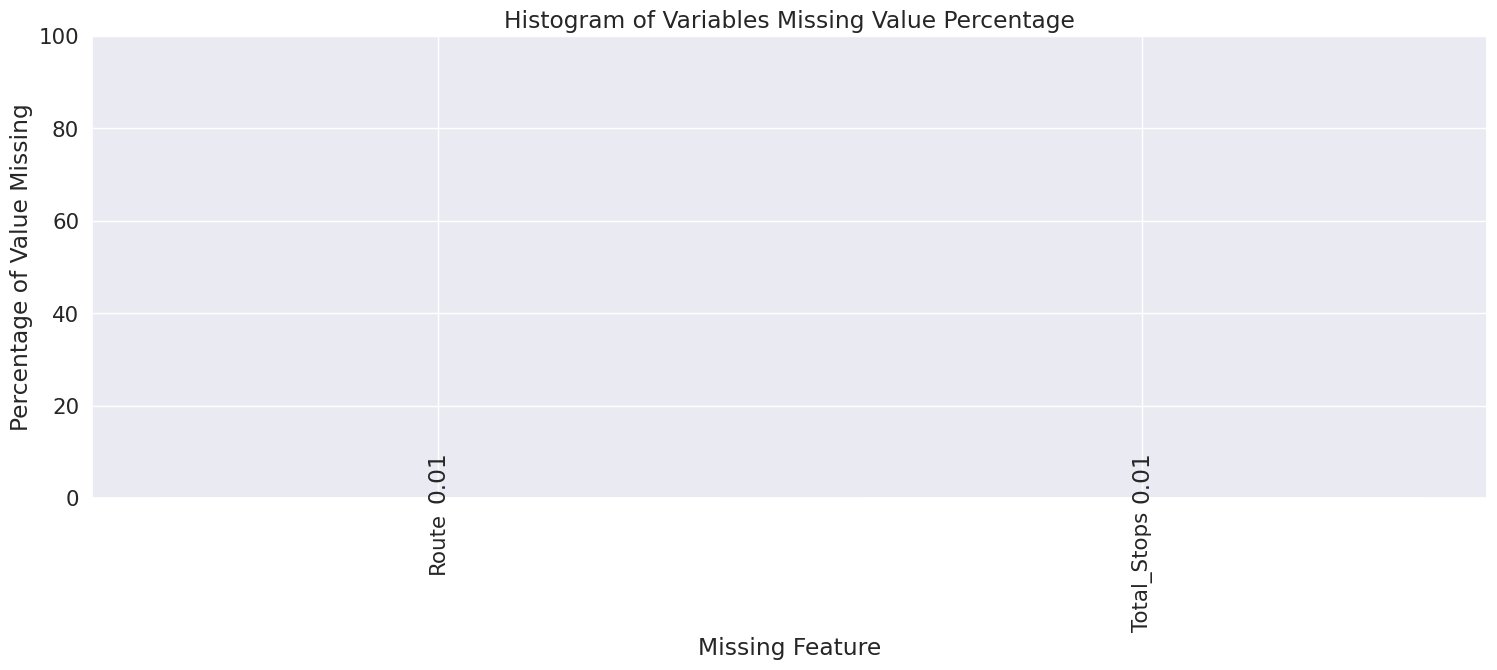

         index  Miss_Values  Miss_Rate  Available_Value
0        Route            1       0.01            10682
1  Total_Stops            1       0.01            10682


[]

In [611]:
exe.graph.missing_value_analysis(df)

In [612]:
df.dropna(inplace=True)

In [613]:
df.shape

(10682, 11)

In [614]:
# list of numerical variables
numerical_features = exe.eda.numerical_features_list(df)

Number of Numerical Variables: 1
   Price
0   3897
1   7662
2  13882
3   6218
4  13302


In [615]:
num_features = exe.eda.column_identify(df,numerical_features)
num_features

{'Price': 1870}

In [616]:
# list of categorical_features
categorical_features = exe.eda.categorical_features_list(df)

Number of Categorical Variables: 10
       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info  
1    05:50         13:15   7h 25m     2 stops         No info  
2    09:25  04:25 10 Jun      19h     2 stops         No info  
3    18:05         23:30   5h 25m      1 stop         No info  
4    16:50         21:35   4h 45m      1 stop         No info  


In [617]:
cat_features = exe.eda.column_identify(df,categorical_features)
cat_features

{'Airline': 12,
 'Date_of_Journey': 44,
 'Source': 5,
 'Destination': 6,
 'Route': 128,
 'Dep_Time': 222,
 'Arrival_Time': 1343,
 'Duration': 368,
 'Total_Stops': 5,
 'Additional_Info': 10}

In [618]:
print(f'Duplicates in this dataset frame: {df.iloc[:,1:].duplicated().sum()}, ({np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%)')
print('')

Duplicates in this dataset frame: 220, (2.1%)



## Exploratory Data Analysis

From description we can see that Date_of_Journey is a object data type,\
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas **to_datetime** to convert object data type to datetime dtype.

<span style="color: red;">**.dt.day method will extract only day of that date**</span>\
<span style="color: red;">**.dt.month method will extract only month of that date**</span>

In [619]:
# df["Dep_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
# df["Dep_month"] = df["Dep_month"].apply(lambda x: exe.format.fill_zeros(x))

In [620]:
# df["Dep_day"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.day
# df["Dep_day"] = df["Dep_day"].apply(lambda x: exe.format.fill_zeros(x))

In [621]:
df["Dep_Weekday"] = pd.to_datetime(df["Date_of_Journey"], format='%d/%m/%Y').dt.weekday
weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['Dep_Weekday'] = df['Dep_Weekday'].map(weekday_names)

In [622]:
df.head(3)
# df.drop(['Date_of_Journey'], axis=1, inplace=True)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Weekday
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Sunday
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Wednesday
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,Sunday


In [623]:
# Departure time is when a plane leaves the gate.
# Similar to Date_of_Journey we can extract values from Dep_Time
# Extracting Hours
df["Dep_hours"] = pd.to_datetime(df["Dep_Time"]).dt.hour
# Extracting Minutes
df["Dep_mins"] = pd.to_datetime(df["Dep_Time"]).dt.minute
# Now we can drop Dep_Time as it is of no use
df["Dep_Time"] = (df["Dep_hours"] + df["Dep_mins"]/60).round(2)

In [624]:
# Define conditions and values for categorization
conditions = [
    (df["Dep_Time"] >= 2) & (df["Dep_Time"] <= 5.99),
    (df["Dep_Time"] >= 6) & (df["Dep_Time"] <= 9.99),
    (df["Dep_Time"] >= 10) & (df["Dep_Time"] <= 13.99),
    (df["Dep_Time"] >= 14) & (df["Dep_Time"] <= 17.99),
    (df["Dep_Time"] >= 18) & (df["Dep_Time"] <= 22)
]
values = ["Before Dawn","Morning","Noon","Afternoon","Evening"]
df['Dep_Interval'] = np.select(conditions, values, default='Midnight')

In [625]:
columns_to_drop = ["Dep_Time","Dep_hours","Dep_mins"]
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [626]:
# Departure time is when a plane leaves the gate.
# Similar to Date_of_Journey we can extract values from Dep_Time
# Extracting Hours
df["Arrival_hours"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
# df["Arrival_hours"] = df["Arrival_hours"].apply(lambda x: exe.format.fill_zeros(x))
# Extracting Minutes
df["Arrival_mins"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
# df["Arrival_mins"] = df["Arrival_mins"].apply(lambda x: exe.format.fill_zeros(x))
# Now we can drop Arrival_Time as it is of no use
df["Arrival_Time"] = (df["Arrival_hours"] + df["Arrival_mins"]/60).round(2)

In [627]:
# Define conditions and values for categorization
conditions = [
    (df["Arrival_Time"] >= 2) & (df["Arrival_Time"] <= 5.99),
    (df["Arrival_Time"] >= 6) & (df["Arrival_Time"] <= 9.99),
    (df["Arrival_Time"] >= 10) & (df["Arrival_Time"] <= 13.99),
    (df["Arrival_Time"] >= 14) & (df["Arrival_Time"] <= 17.99),
    (df["Arrival_Time"] >= 18) & (df["Arrival_Time"] <= 22)
]
values = ["Before Dawn","Morning","Noon","Afternoon","Evening"]
df['Arrival_Interval'] = np.select(conditions, values, default='Midnight')

In [628]:
columns_to_drop = ["Arrival_Time","Arrival_hours","Arrival_mins"]
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [629]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time

# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

Duration_hours = []
Duration_mins = []
for i in range(len(duration)):
    Duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    Duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [630]:
df["Duration_hours"] = Duration_hours
df["Duration_mins"] = Duration_mins
df["Duration(mins)"] = df["Duration_hours"]*60 + df["Duration_mins"]
columns_to_drop = ["Duration_hours","Duration_mins","Duration"]
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [631]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Weekday,Dep_Interval,Arrival_Interval,Duration(mins)
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,Sunday,Midnight,Midnight,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,Wednesday,Before Dawn,Noon,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,Sunday,Morning,Before Dawn,1140


### Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [632]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

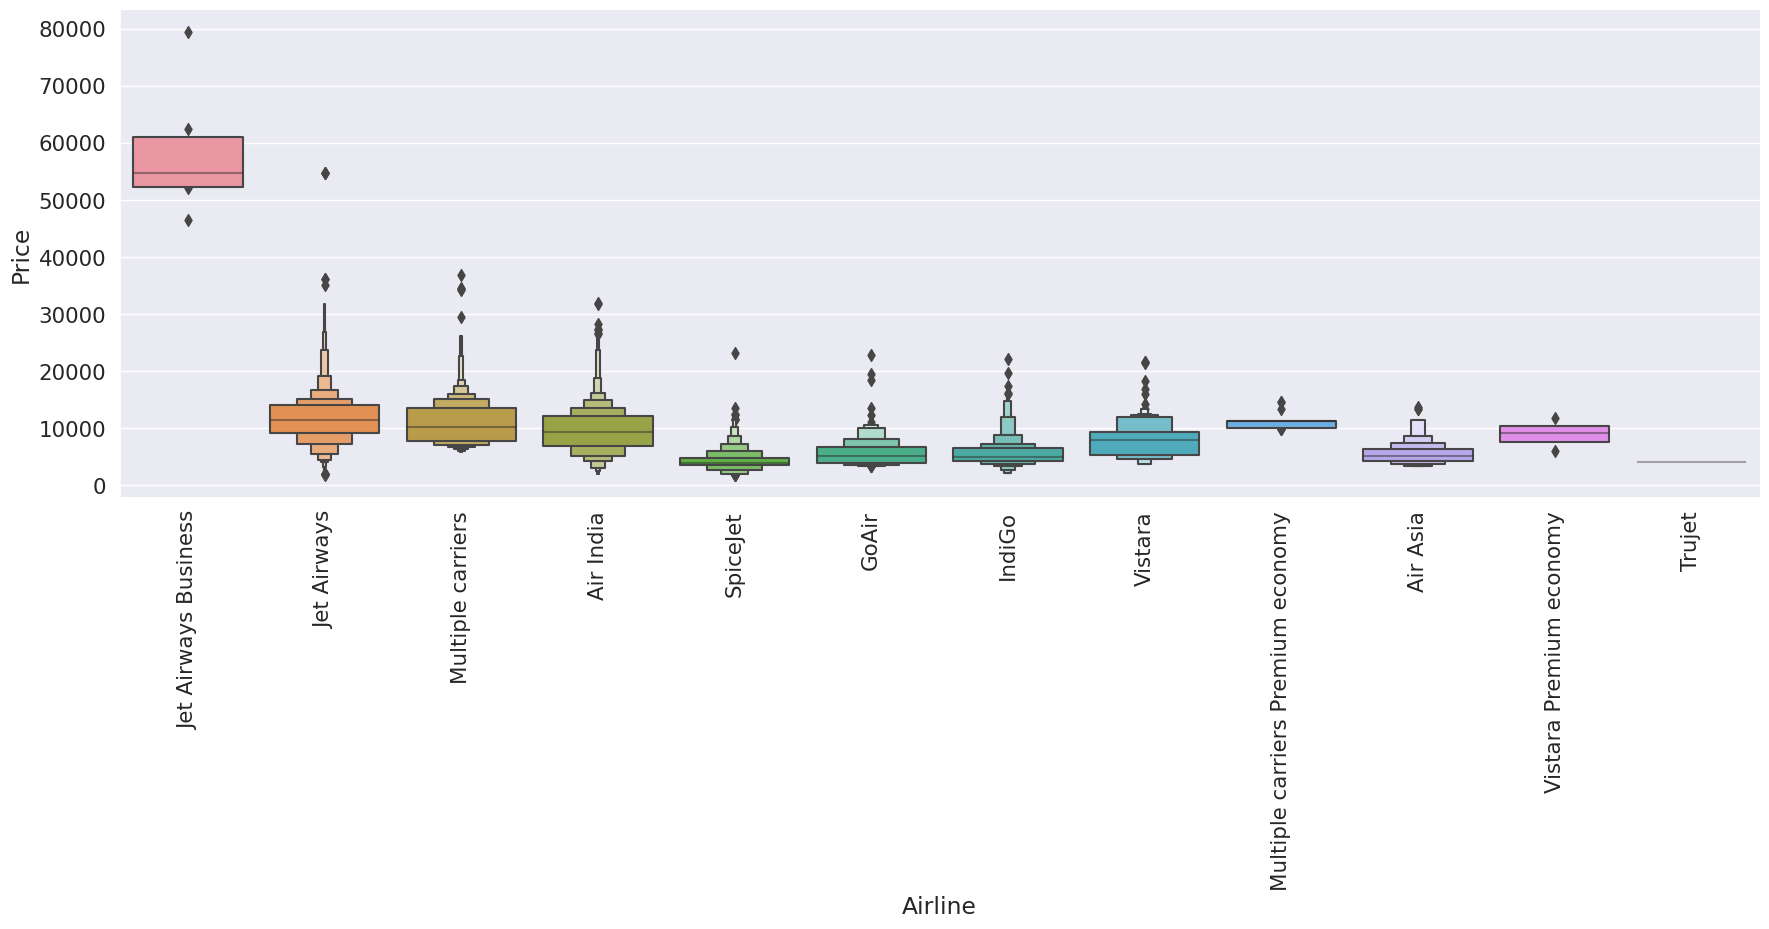

In [633]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
ax = sns.catplot(y="Price", x="Airline", data=df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
ax.set_xticklabels(rotation=90)
plt.show()

In [634]:
number=10
column="Airline"
filtered_airline_list = exe.eda.filtered_value_list(df,column,number)
filtered_airline_count = exe.eda.filtered_value_count(df,column,number)

In [635]:
filtered_airline_list

['Jet Airways Business', 'Vistara Premium economy', 'Trujet']

In [636]:
filtered_airline_count

Jet Airways Business       6
Vistara Premium economy    3
Trujet                     1
Name: Airline, dtype: int64

In [637]:
df = df[~df["Airline"].isin(filtered_airline_list)]
df.shape

(10672, 12)

In [638]:
df["Source"].value_counts()

Delhi       4534
Kolkata     2871
Banglore    2191
Mumbai       696
Chennai      380
Name: Source, dtype: int64

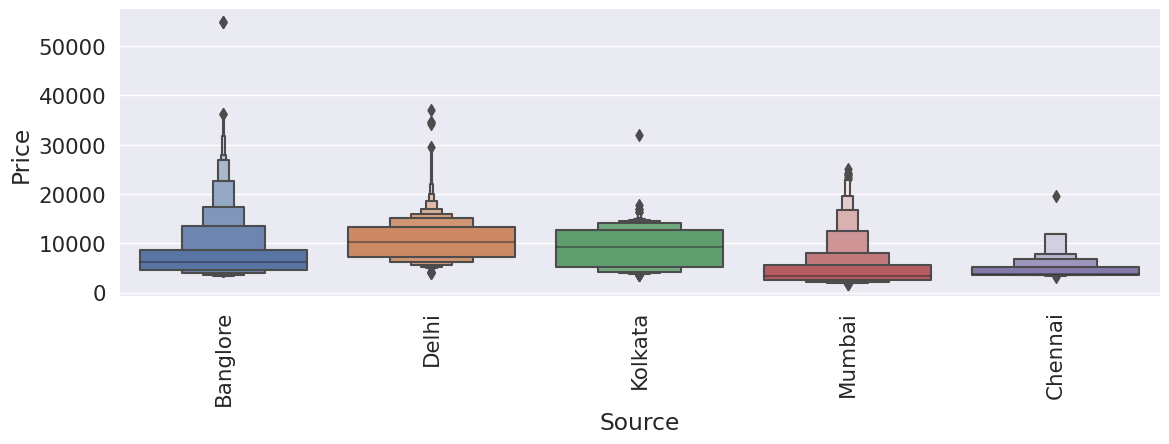

In [639]:
# Source vs Price
ax = sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
ax.set_xticklabels(rotation=90)
plt.show()

In [640]:
df["Destination"].value_counts()

Cochin       4534
Banglore     2871
Delhi        1264
New Delhi     927
Hyderabad     696
Kolkata       380
Name: Destination, dtype: int64

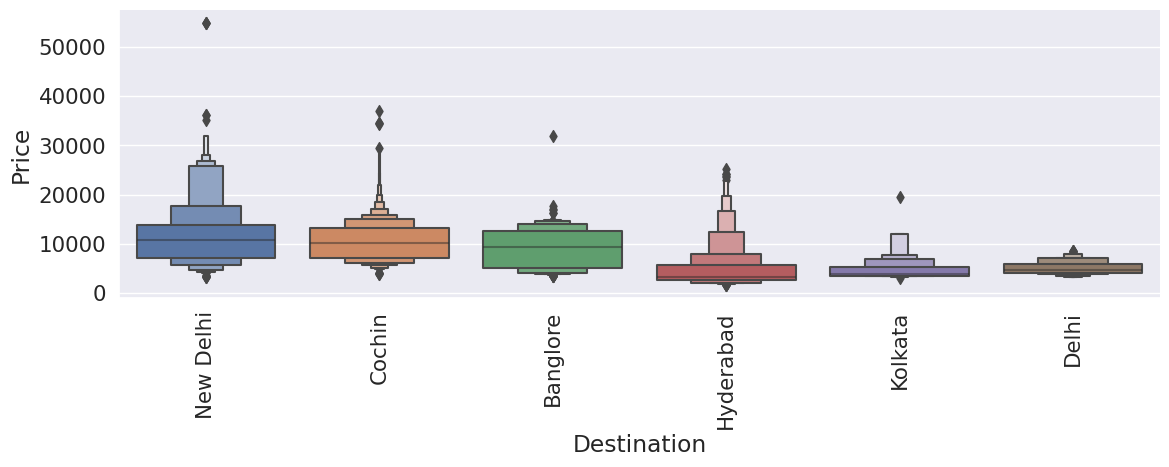

In [641]:
# Destination vs Price
ax = sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
ax.set_xticklabels(rotation=90)
plt.show()

In [642]:
df["Additional_Info"].value_counts()

No info                         8337
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
No Info                            3
1 Short layover                    1
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [643]:
df.drop(["Additional_Info"], axis=1, inplace=True)

In [644]:
df["Route"].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1550
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → RPR → HYD → BLR       1
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → BBI → HYD             1
Name: Route, Length: 127, dtype: int64

In [645]:
df.drop(["Route"], axis=1, inplace=True)

In [646]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [647]:
df

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Dep_Weekday,Dep_Interval,Arrival_Interval,Duration(mins)
0,IndiGo,24/03/2019,Banglore,New Delhi,0,3897,Sunday,Midnight,Midnight,170
1,Air India,1/05/2019,Kolkata,Banglore,2,7662,Wednesday,Before Dawn,Noon,445
2,Jet Airways,9/06/2019,Delhi,Cochin,2,13882,Sunday,Morning,Before Dawn,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,1,6218,Sunday,Evening,Midnight,325
4,IndiGo,01/03/2019,Banglore,New Delhi,1,13302,Friday,Afternoon,Evening,285
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,0,4107,Tuesday,Evening,Midnight,150
10679,Air India,27/04/2019,Kolkata,Banglore,0,4145,Saturday,Evening,Midnight,155
10680,Jet Airways,27/04/2019,Banglore,Delhi,0,7229,Saturday,Morning,Noon,180
10681,Vistara,01/03/2019,Banglore,New Delhi,0,12648,Friday,Noon,Afternoon,160


In [648]:
df.drop(["Date_of_Journey"], axis=1, inplace=True)

In [649]:
df

,Airline,Source,Destination,Total_Stops,Price,Dep_Weekday,Dep_Interval,Arrival_Interval,Duration(mins)
0,IndiGo,Banglore,New Delhi,0,3897,Sunday,Midnight,Midnight,170
1,Air India,Kolkata,Banglore,2,7662,Wednesday,Before Dawn,Noon,445
2,Jet Airways,Delhi,Cochin,2,13882,Sunday,Morning,Before Dawn,1140
3,IndiGo,Kolkata,Banglore,1,6218,Sunday,Evening,Midnight,325
4,IndiGo,Banglore,New Delhi,1,13302,Friday,Afternoon,Evening,285
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,Tuesday,Evening,Midnight,150
10679,Air India,Kolkata,Banglore,0,4145,Saturday,Evening,Midnight,155
10680,Jet Airways,Banglore,Delhi,0,7229,Saturday,Morning,Noon,180
10681,Vistara,Banglore,New Delhi,0,12648,Friday,Noon,Afternoon,160


In [650]:
%cd '{result_dir}'
!pwd

/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6P03-Flight Fare Prediction/result
/content/drive/MyDrive/3.0 Colab Project/3.0 Github Portfolio Project/S6P03-Flight Fare Prediction/result


In [652]:
df.to_csv('S603_EDA_Dataset.csv', index=False)